In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

%matplotlib inline

from astropy.io import ascii


In [2]:
data = ascii.read( 'global_SF6_MM.dat' )
data

SF6ottoyr,SF6ottomon,SF6ottoNHm,SF6ottoNHsd,SF6ottoSHm,SF6ottoSHsd,SF6ottoGLm,SF6ottoGLsd
int32,int32,float64,float64,float64,float64,float64,float64
1995,1,3.533,0.029,3.207,0.125,3.37,0.064
1995,2,3.512,0.154,3.282,0.193,3.397,0.122
1995,3,3.558,0.159,3.244,0.12,3.401,0.1
1995,4,3.618,0.09,3.287,0.17,3.453,0.094
1995,5,3.626,0.133,3.308,0.139,3.467,0.099
1995,6,3.551,0.119,3.297,0.112,3.424,0.081
1995,7,3.677,0.093,3.262,0.124,3.47,0.078
1995,8,3.675,0.211,3.259,0.191,3.467,0.143
1995,9,3.626,0.063,3.346,0.064,3.486,0.043


In [3]:
data = data['SF6ottoyr', 'SF6ottomon', 'SF6ottoGLm','SF6ottoGLsd']
data = data.to_pandas()
data

,SF6ottoyr,SF6ottomon,SF6ottoGLm,SF6ottoGLsd
0,1995,1,3.370,0.064
1,1995,2,3.397,0.122
2,1995,3,3.401,0.100
3,1995,4,3.453,0.094
4,1995,5,3.467,0.099
...,...,...,...,...
223,2013,8,NaN,NaN
224,2013,9,NaN,NaN
225,2013,10,NaN,NaN
226,2013,11,NaN,NaN


In [17]:
#Making the date column
i = 0
l = []
for i in range(len(data)):
    year_col = str(data.loc[i, 'SF6ottoyr']) + '-'
    mon_col = str(data.loc[i, 'SF6ottomon'])
    combined_col = year_col + mon_col
    l.append(combined_col)
#print(l)

#d = {'SF6ottoyear_and_mon':l} #'SF6ottoGLm', 'SF6ottoGLsd'
mod_data_df = pd.DataFrame(data = l, columns = ['SF6ottoyear_and_mon'])
mod_data_df

#mod_data_df['SF6ottoyear_and_mon'] = pd.to_datetime(mod_data_df['SF6ottoyear_and_mon'], format='%y%m%d')


# data1 = [data, mod_data_df]
# data1 = pd.concat(data1)
# data1.loc[:, ['SF6ottoyear_and_mon', 'SF6ottoGLm', 'SF6ottoGLsd']]
# data1
data['SF6ottoyear_and_mon'] = mod_data_df.loc[:, 'SF6ottoyear_and_mon']
data.loc[:, ['SF6ottoyear_and_mon','SF6ottoGLm','SF6ottoGLsd']]

,SF6ottoyear_and_mon,SF6ottoGLm,SF6ottoGLsd
0,1995-1,3.370,0.064
1,1995-2,3.397,0.122
2,1995-3,3.401,0.100
3,1995-4,3.453,0.094
4,1995-5,3.467,0.099
...,...,...,...
223,2013-8,NaN,NaN
224,2013-9,NaN,NaN
225,2013-10,NaN,NaN
226,2013-11,NaN,NaN


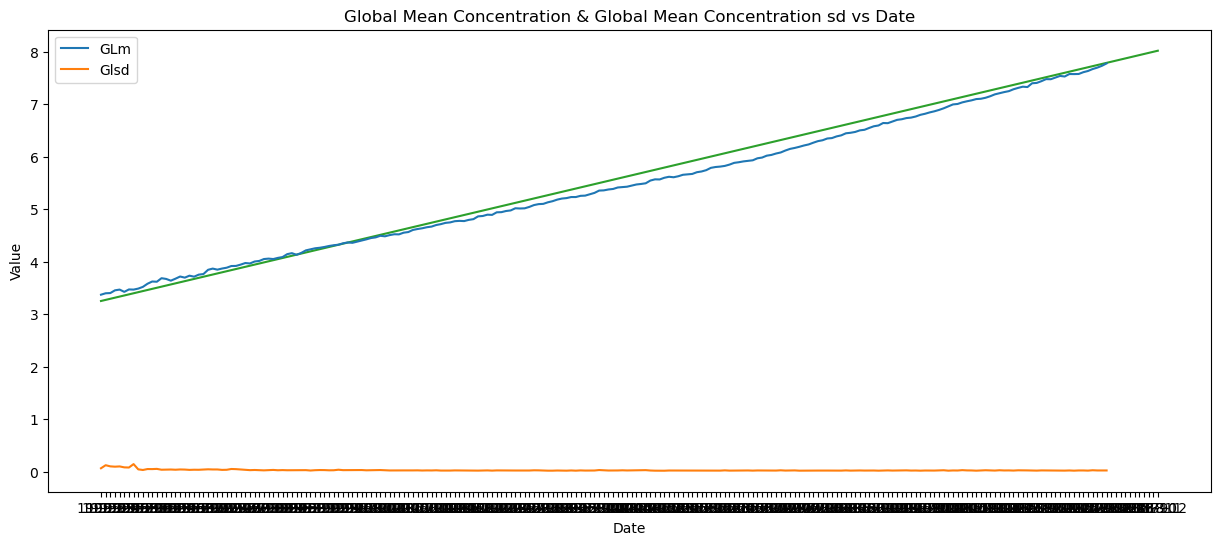

In [38]:
plt.figure(figsize = (15, 6))
x1 = data.loc[:, 'SF6ottoyear_and_mon']
y1 = data.loc[:, 'SF6ottoGLm']
plt.errorbar(x1, y1, label = 'GLm')

x2 = data.loc[:, 'SF6ottoyear_and_mon']
y2 = data.loc[:, 'SF6ottoGLsd']
plt.errorbar(x2, y2, label = 'Glsd')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Global Mean Concentration & Global Mean Concentration sd vs Date')
plt.legend()

x3 = np.arange(228)
m = 0.021
b = 3.25
y3 = m*x + b
plt.plot(x3, y3)
plt.show()

In [ ]:
#I ran out of time to finish this, but I was going to use scipy.optimize to finish fitting the curve. 